In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
X_train = pd.read_csv("Logistic_X_Train.csv")
Y_train = pd.read_csv("Logistic_Y_Train.csv")
print(X_train.shape,Y_train.shape)

(3000, 3) (3000, 1)


In [3]:
X_train = X_train.values
Y_train = Y_train.values

In [4]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def hypothesis(x,theta):
    return sigmoid(np.dot(x,theta))

def error(Y,X,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_hat = hypothesis(X[i],theta)
        total_error += (Y[i]*np.log2(y_hat)+(1-Y[i])*np.log2(1-y_hat))     
    return total_error/m #Average Loss

def get_grad(Y,X,theta):
    grad = np.zeros(theta.shape)
    m = X.shape[0]
    for i in range(m):
        y_hat = hypothesis(X[i],theta)
        x = X[i].reshape((-1,1))
        grad += (Y[i] - y_hat)*x  
    return grad/m #Average Gradient

# One Iteration of Gradient Descent
def grad_descent(X,Y,learning_rate=0.5):
    theta = np.zeros((X.shape[1],1))
    error_list = []
    for i in range(500):
        theta = theta + learning_rate*get_grad(Y,X,theta)
        e = error(Y,X,theta)
        error_list.append(e)
    return theta,error_list
    
def predict(Xtest,theta):
    prob = hypothesis(Xtest,theta)
    if prob<=0.5:
        return 0
    else:
        return 1
    
def get_acc(x,y,theta): 
    y_pred = np.array([predict(x[i],theta) for i in range(x.shape[0])])
    y_pred = y_pred.reshape(-1,1)
    return  100 * (float((y_pred==y).sum())/y.shape[0])

In [6]:
theta,error_list  = grad_descent(X_train,Y_train)

In [7]:
print(theta)

[[-1.78203643]
 [ 1.19204401]
 [-3.58655303]]


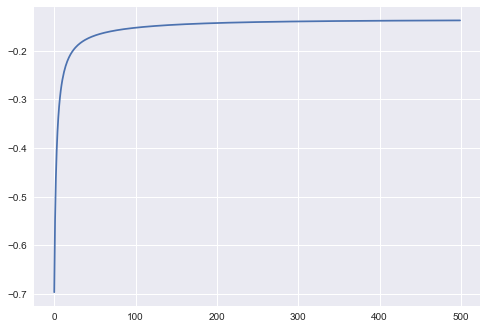

In [10]:
plt.style.use("seaborn")
plt.plot(error_list)
plt.show()

In [11]:
acc = get_acc(X_train,Y_train,theta)
print("Accuracy on Training set is",acc)

Accuracy on Training set is 96.73333333333333


In [12]:
X_test = pd.read_csv("Logistic_X_Test.csv")
print(X_test.shape)

(1000, 3)


In [13]:
X_test = X_test.values

In [14]:
Y_test_pred = np.array([predict(X_test[i],theta) for i in range(X_test.shape[0])])

In [15]:
print(Y_test_pred)
print(Y_test_pred.shape)

[1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1
 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0
 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1
 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0
 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1
 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0
 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1
 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0
 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0
 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0
 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0
 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0
 0 1 0 1 0 1 0 0 1 0 0 0 

In [17]:
outcome = pd.DataFrame({"label":Y_test_pred})
outcome.to_csv("sample_output.csv", index= False)